In [17]:
import os
os.chdir('all_datasets/flakytest/')
print(os.getcwd() )


FileNotFoundError: [Errno 2] No such file or directory: 'all_datasets/flakytest/'

### 给文件添加相应属性

In [27]:
import pandas as pd

# 读取两个文件
summary = pd.read_excel("summary.xlsx")
starchat_summary = pd.read_excel("starchat_summary.xlsx")

# 添加新列
starchat_summary['reason'] = summary['reason'].str.replace('_', ' ')
starchat_summary['label'] = (starchat_summary['answer'] == starchat_summary['reason']).astype(int)

# 保存更新后的文件
starchat_summary.to_excel("starchat_summary.xlsx", index=False)


In [42]:
import pandas as pd
df=pd.read_excel('starchat_summary.xlsx', index_col=0)
df["answer"].unique()

array(['async wait', 'concurrency', nan, 'IO', 'test order dependency',
       'randomness', 'test case timeout', 'time'], dtype=object)

In [43]:
answers = ['async wait', 'concurrency', 'floating point operations', 'i_o',
       'network', 'platform dependency', 'randomness', 'resource leak',
       'test case timeout', 'test order dependency', 'time',
       'too restrictive range', 'unordered collections']
answers_names = {'async wait':"Async Wait", 'concurrency':'Concurrency', 'floating point operations':'Floating', 'i_o':"IO",
       'network':"Network", 'platform dependency':"Platform Dependency", 'randomness':"Randomness", 'resource leak':"Resource Leak",
       'test case timeout':"Test Timeout", 'test order dependency':"Test Order", 'time':"Time",
       'too restrictive range':"Range", 'unordered collections':"Unordered Collections"}
from collections import Counter
list_one = []
list_zero = []
list_neg = []
list_names = []
df["reason"]=df["reason"].apply(lambda x: x.replace("_", " ") if x!='i_o' else x )
for a in answers:
    l = df[df["reason"] == a]["label"].tolist()
    c = Counter(l)
    print(a)
    print(c)
    list_one.append( c[1])  if 1 in c else list_one.append(0)
    list_zero.append( c[0])  if 0 in c else list_zero.append(0)
    list_neg.append( c[-1])  if -1 in c else list_neg.append(0)
    list_names.append(answers_names[a])
print(sum(list_one)/65)


async wait
Counter({1: 5})
concurrency
Counter({1: 3, 0: 2})
floating point operations
Counter({0: 5})
i_o
Counter()
network
Counter({0: 5})
platform dependency
Counter({0: 5})
randomness
Counter({0: 4, 1: 1})
resource leak
Counter({0: 5})
test case timeout
Counter({0: 4, 1: 1})
test order dependency
Counter({0: 4, 1: 1})
time
Counter({0: 4, 1: 1})
too restrictive range
Counter({0: 5})
unordered collections
Counter({0: 5})
0.18461538461538463


In [40]:
print(list_one)
print(list_zero)
print(list_neg)
print(list_names)

[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['Async Wait', 'Concurrency', 'Floating', 'IO', 'Network', 'Platform Dependency', 'Randomness', 'Resource Leak', 'Test Timeout', 'Test Order', 'Time', 'Range', 'Unordered Collections']


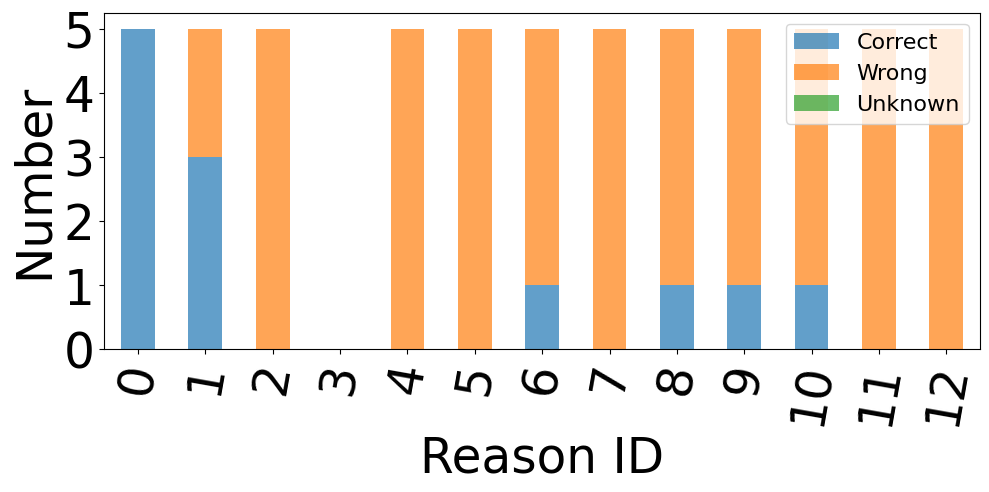

In [44]:
# create DataFrame
idListName=[ i for i,v in enumerate(list_names)]
res_df = pd.DataFrame({'Correct': list_one,
                   'Wrong':list_zero,
                   'Unknown':list_neg},
                  index=idListName)
 
 
# create stacked bar chart for monthly temperatures
res_df.plot(kind='bar', stacked=True,  alpha=0.7,figsize=(10,5))

import matplotlib.pyplot as plt
# labels for x & y axis
plt.xticks(rotation=80, fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel('Reason ID', fontsize=35)
plt.ylabel('Number', fontsize=35)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('starchat_flaky_prediction.pdf')
